In [1]:
import numpy as np
from matplotlib import pyplot as plt

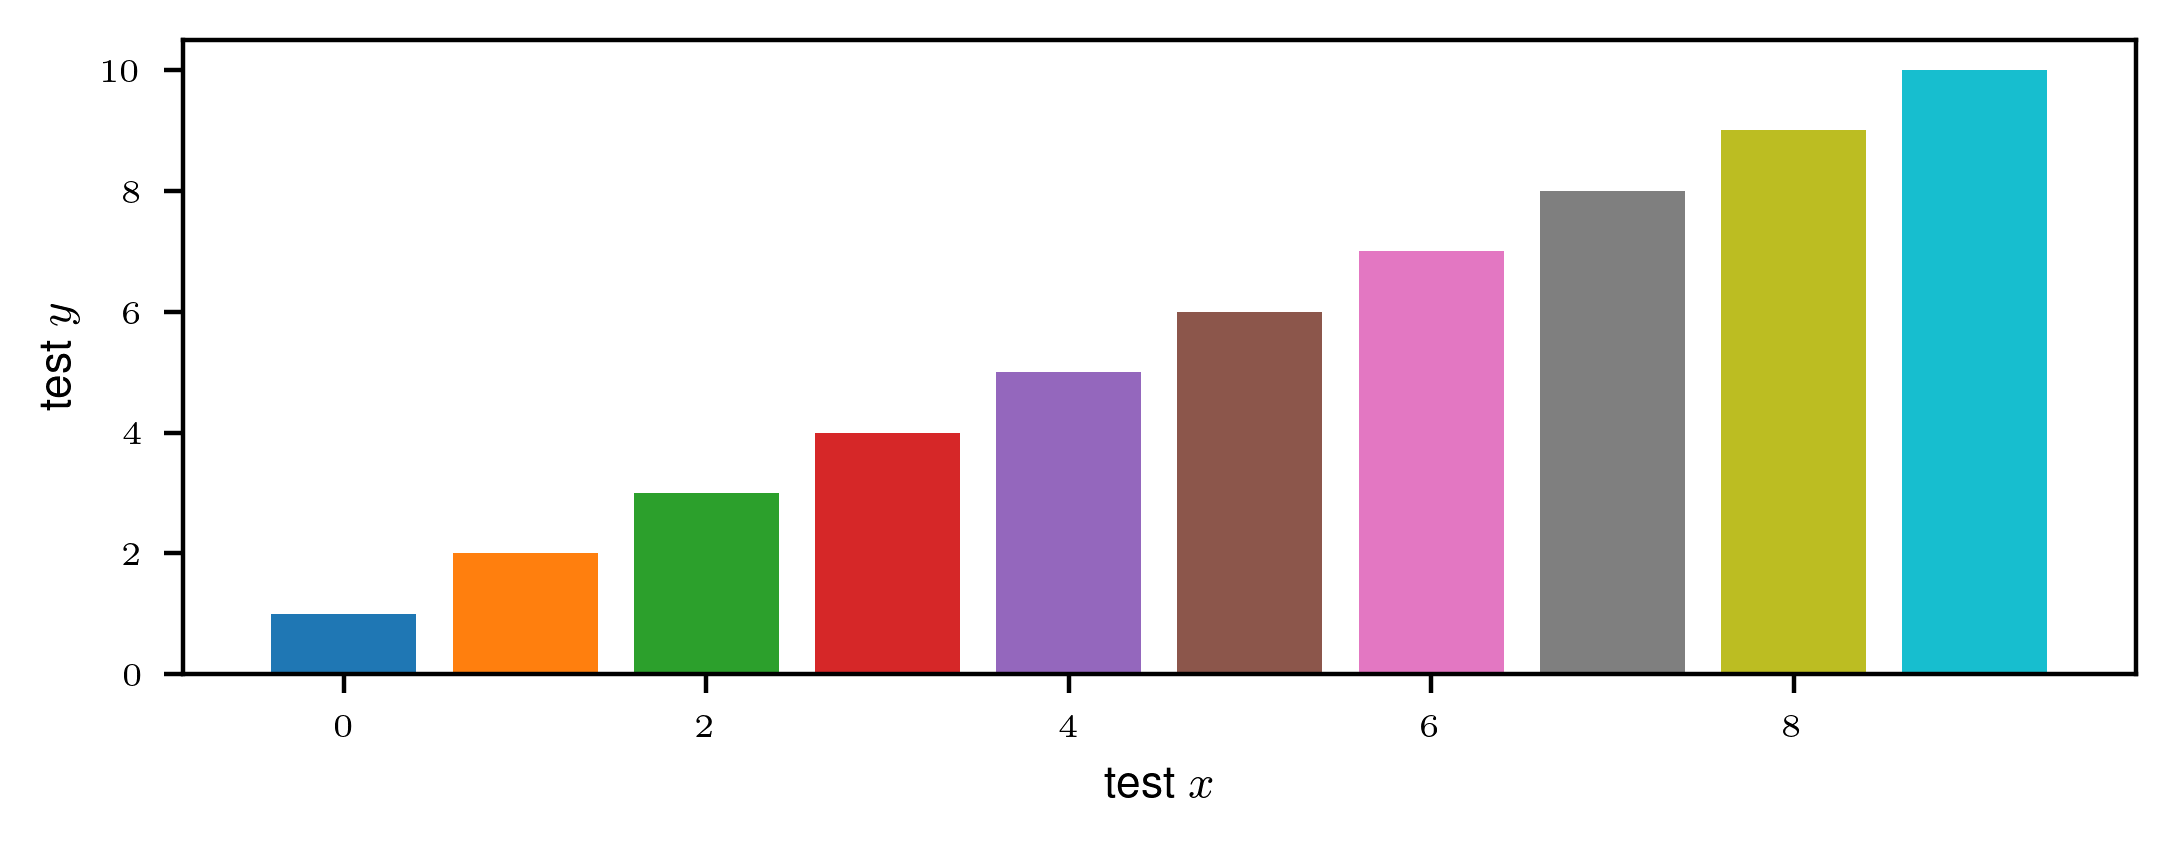

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'sans-serif', 'sans-serif': ['Helvetica']})
matplotlib.rc('text', usetex=True)

plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

plt.style.use(['paper.mplstyle'])

In [4]:
#compute prep amount fot the different networks
rdn_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_rdn/seed_1_mixed"
skew_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_skew/seed_3_4.0_mixed"
disc_dir = "//home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_skew/seed_1.5_0.8_0.1_mixed"
soc_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_1_mixed"
surrogate_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_sim_soc/seed_1_mixed"
def rates_rdn(i=0,t=300):
    return np.loadtxt(f"{rdn_dir}/rates_{i}_{t}")

def rates_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/rates_{i}_{t}")


def rates_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/rates_{i}_{t}")

def rates_surrogate(i=0, t=300):
    return np.loadtxt(f"{surrogate_dir}/rates_{i}_{t}")


def rates_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/rates_{i}_{t}")

def us_rdn(i=0,t=300):
    return np.loadtxt(f"{rdn_dir}/us_{i}_{t}")

def us_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/us_{i}_{t}")

def us_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/us_{i}_{t}")


def us_surrogate(i=0, t=300):
    return np.loadtxt(f"{surrogate_dir}/us_{i}_{t}")

def us_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/us_{i}_{t}")

def thetas_rdn(i=0,t=300):
    return np.loadtxt(f"{rdn_dir}/thetas_{i}_{t}")

def thetas_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/thetas_{i}_{t}")

def thetas_surrogate(i=0,t=300):
    return np.loadtxt(f"{surrogate_dir}/thetas_{i}_{t}")

def thetas_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/thetas_{i}_{t}")

def thetas_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/thetas_{i}_{t}")

targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.05_0.000005_5.0/ramping_soc/seed_1_mixed/targets")
soc_eigs = np.loadtxt(f"{soc_dir}/eigs")
skew_eigs = np.loadtxt(f"{skew_dir}/eigs")
rdn_eigs = np.loadtxt(f"{rdn_dir}/eigs")
surrogate_eigs = np.loadtxt(f"{surrogate_dir}/eigs")


In [5]:
n_targets = 6
times = [0, 50, 100, 300, 500]
def prep_idx(dir):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 ) - 1
            u_prep, u_mov = us[:cutoff], us[cutoff:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_u(dir):
    def cost_u(t, i):
       return np.loadtxt(f'{dir}/u_cost_{i}_{t}')[-1]
    def get_all_idces(i):
        ai = np.asarray([cost_u(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_tgt(dir):
    def cost_tgt(t, i):
       return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[-1]
    def get_all_idces(i):
        ai = np.asarray([cost_tgt(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def cost_torques(dir):
    def cost_torques(t, i):
       return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[0]
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def mv_loss(dir):
    def cost_torques(t, i):
       return np.loadtxt(f'{dir}/loss_{i}_{t}').sum()
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

In [6]:
m_prep_rdn, _ = prep_idx(rdn_dir)
m_prep_skew, _ = prep_idx(skew_dir)
m_prep_soc, _ = prep_idx(soc_dir)
m_prep_disc,_  = prep_idx(disc_dir)
m_prep_surrogate,_  = prep_idx(surrogate_dir)

m_loss_rdn, _ = mv_loss(rdn_dir)
m_loss_skew, _ = mv_loss(skew_dir)
m_loss_soc, _ = mv_loss(soc_dir)
m_loss_disc,_  = mv_loss(disc_dir)
m_loss_surrogate,_  = mv_loss(surrogate_dir)
print(m_prep_rdn, m_loss_rdn)

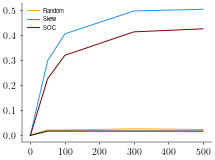

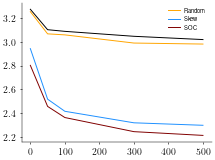

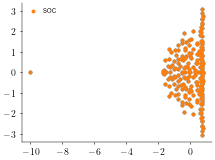

In [ ]:
c_nets = {"rdn":"orange", "skew":"dodgerblue", "soc":"maroon", "lr":"forestgreen", "disc":"black", "surrogate":"darkmagenta"}

plt.plot(times, m_prep_rdn, c_nets["rdn"], label="Random")
plt.plot(times, m_prep_skew,  c_nets["skew"], label="Skew")
plt.plot(times, m_prep_soc,  c_nets["soc"], label="SOC")
plt.plot(times, m_prep_disc,  c_nets["disc"])
plt.legend()

plt.figure()
plt.plot(times, m_loss_rdn,  c_nets["rdn"], label="Random")
plt.plot(times, m_loss_skew,   c_nets["skew"], label="Skew")
plt.plot(times, m_loss_soc,   c_nets["soc"], label="SOC")
plt.plot(times, m_loss_disc, color="k")
plt.legend()

plt.figure()
plt.scatter(surrogate_eigs[:,0], surrogate_eigs[:,1])
plt.scatter(soc_eigs[:,0], soc_eigs[:,1], label = "SOC")
plt.legend()

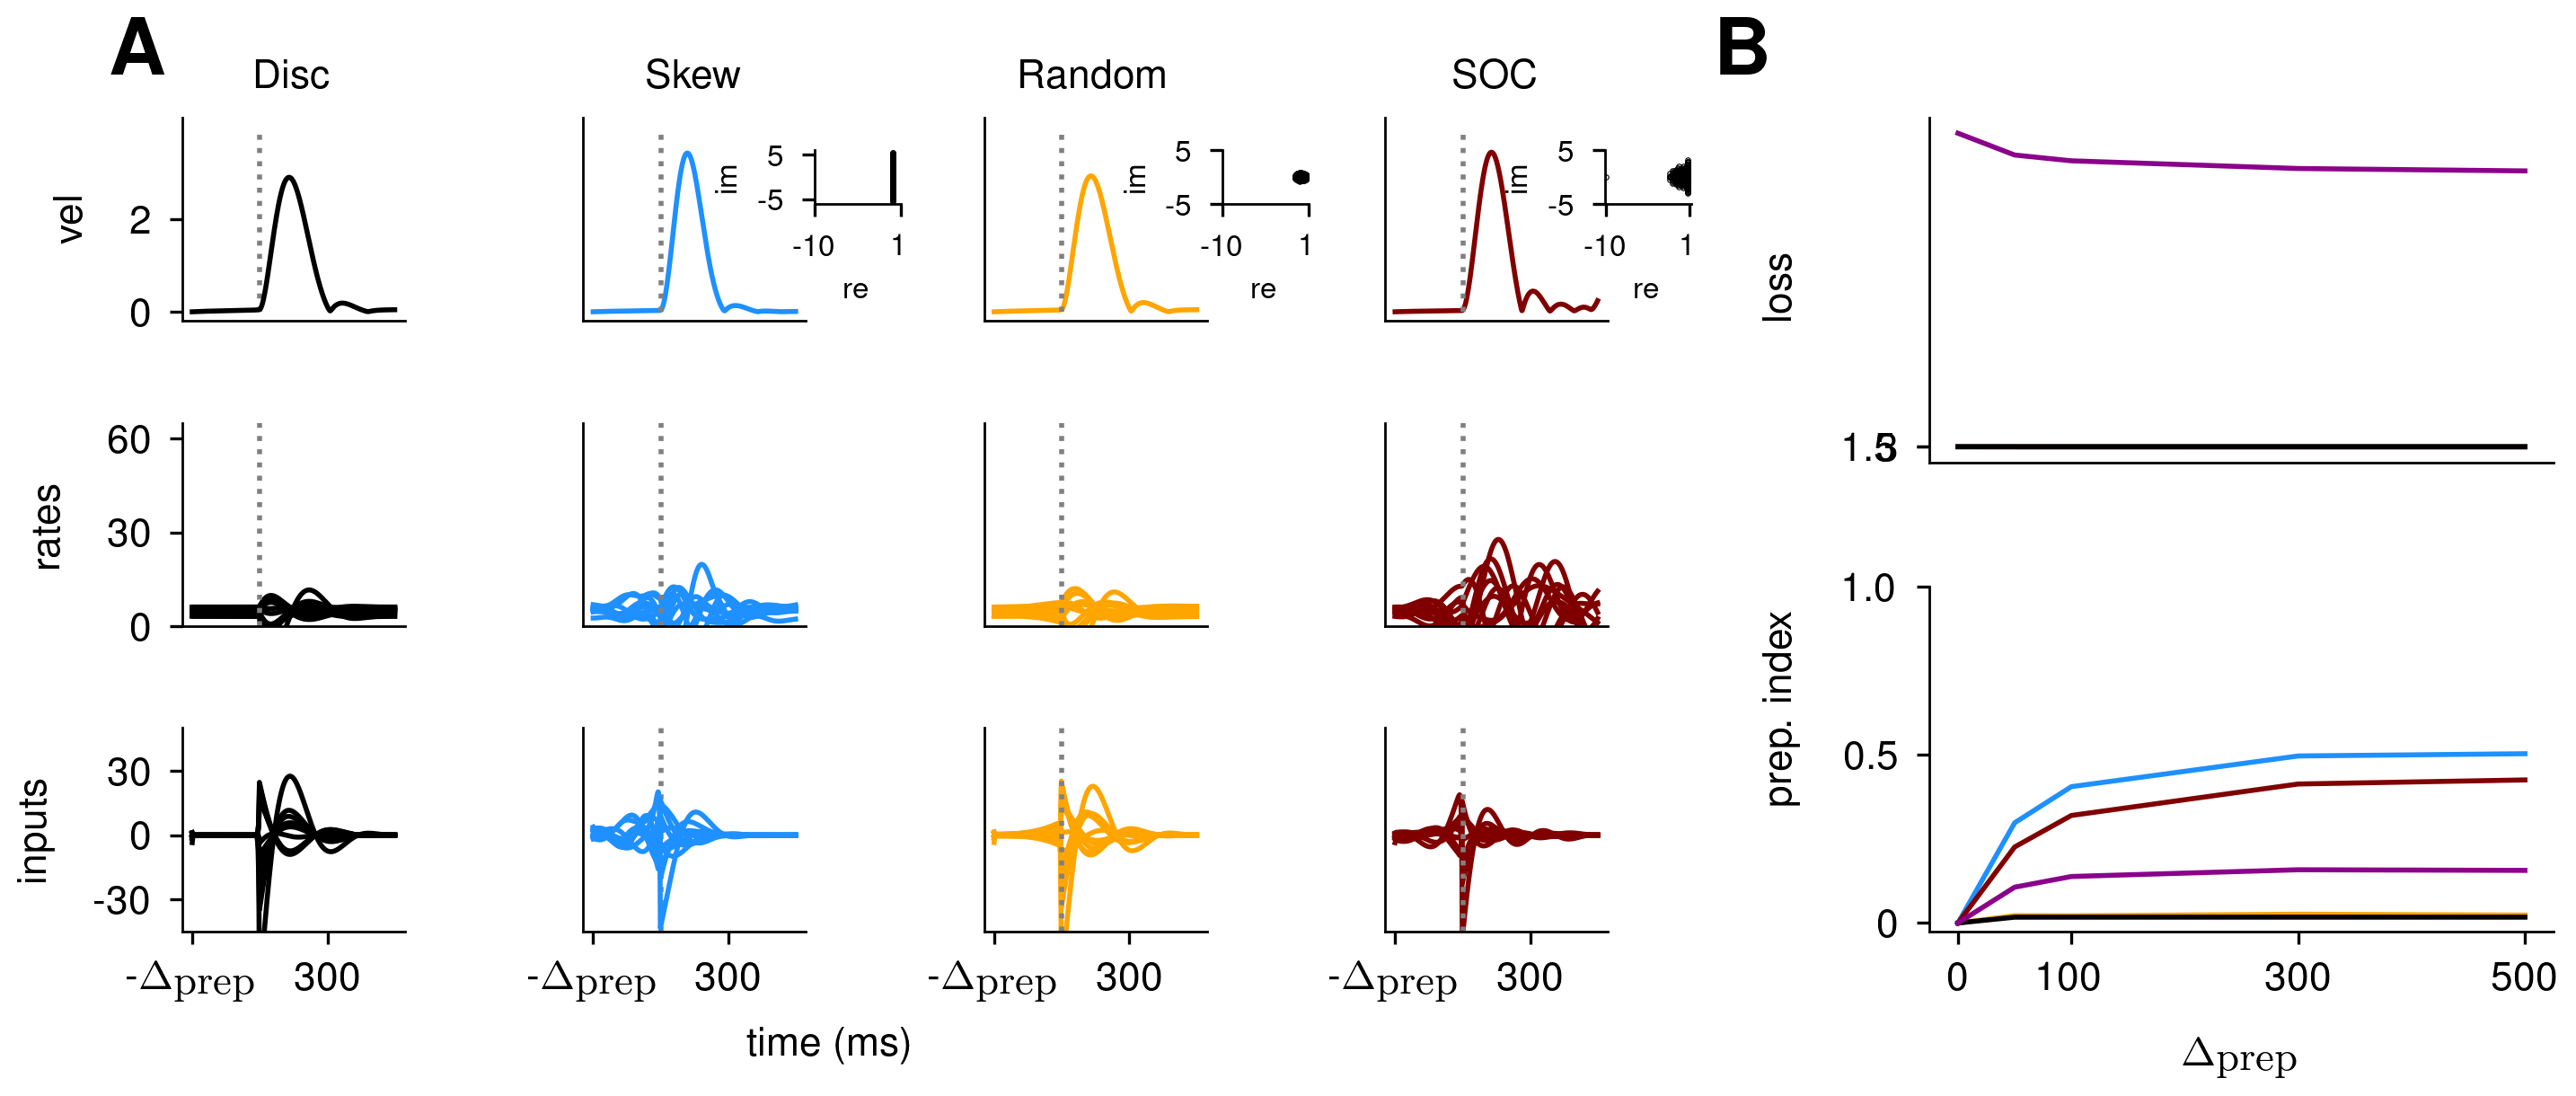

In [ ]:
import matplotlib
import matplotlib.gridspec as gridspec

v1 = 1
v2 = 3
#for now just for visualization
gs = gridspec.GridSpec(3, 6)
fig, axes = plt.subplots(nrows=3, ncols=6,  figsize=(8, 3), dpi = 400)
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.8)

cs = ["darkcyan", "darkorange", 'rosybrown', 'indigo', 'deepskyblue', 'royalblue', 'slategray']
neurons = [0, 8, 11, 20, 44, 100, 101, 144, 198, 199]

ax_loss = plt.subplot(gs[:2,4:])
ax_prep = plt.subplot(gs[2:,4:])

## Disc
ax00 = plt.subplot(gs[0,0])
ax00.set_yticks([0,3], [0,3], fontsize=fs)
ax00.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax00.set_xticks([])
ax00.set_title("Disc",  fontsize=fs)
ax01 = plt.subplot(gs[1,0])
ax02 = plt.subplot(gs[2,0])
ax00.plot(np.sqrt(thetas_disc()[:,2]**2+thetas_disc()[:,3]**2),  c_nets["disc"])
ax00.set_xticks([])
ax00.set_yticks([0,2], [0,2])
ax00.set_ylabel('vel', fontsize = fs)
ax01.plot(rates_disc()[:,:10], c_nets["disc"])
ax01.set_yticks([0,30, 60], [0,30, 60], fontsize=fs)
ax01.set_ylim(0,65)
ax01.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax01.set_xticks([])
ax01.set_ylabel('rates', fontsize = fs)
ax02.plot(us_disc()[:,:10], c_nets["disc"])
ax02.set_ylim(-45,50)
ax02.set_ylabel('inputs', fontsize = fs)
ax02.set_yticks([-30,0,30], [-30,0,30], fontsize=fs)
ax02.set_xticks([0,300], ['-$\\Delta_{\\textrm{prep}}$', '300'], fontsize=fs)


## Skew
ax01 = plt.subplot(gs[0,1])
ax01.set_yticks([])
ax01.set_xticks([])
ax01.set_title("Skew", fontsize=fs)
ax11 = plt.subplot(gs[1,1])
ax21 = plt.subplot(gs[2,1])
ax01.plot(np.sqrt(thetas_skew()[:,2]**2+thetas_skew()[:,3]**2), color = c_nets["skew"])
ax01.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax01.set_xticks([])
ax11.plot(rates_skew()[:,:10], color = c_nets["skew"])
ax21.set_ylim(-45,50)
ax21.vlines(150, -45, 50, color="gray", linestyle="dotted")
ax21.set_yticks([])
ax11.set_ylim(0,65)
ax11.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax11.set_xticks([])
ax11.set_yticks([])
ax21.set_xticks([0,300], ['-$\\Delta_{\\textrm{prep}}$', '300'], fontsize=fs)
ax21.plot(us_skew()[:,:10], color = c_nets["skew"])
left, bottom, width, height = [0.345, 0.8, 0.03, 0.05]
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(skew_eigs[:,0],skew_eigs[:,1], 'ok', markersize=0.2)
ax1.set_yticks([-5,5], [-5,5], fontsize=fs_m1)
ax1.set_xticks([-10,1], [-10,1], fontsize=fs_m1)
ax1.set_ylabel('im', fontsize=fs_m1, labelpad = 3)
ax1.set_xlabel('re', fontsize=fs_m1,labelpad = 3)


ax02 = plt.subplot(gs[0,2])
ax02.set_yticks([])
ax02.set_xticks([])
ax02.set_title("Random", fontsize=fs)
ax12 = plt.subplot(gs[1,2])
ax22 = plt.subplot(gs[2,2])
ax02.plot(np.sqrt(thetas_rdn()[:,2]**2+thetas_rdn()[:,3]**2), c_nets["rdn"])
ax02.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax02.set_xticks([])
ax12.plot(rates_rdn()[:,:10], color = c_nets["rdn"])
ax12.set_ylim(0,65)
ax12.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax12.set_xticks([])
ax12.set_yticks([])
ax22.plot(us_rdn()[:,:10], color = c_nets["rdn"])
ax22.set_yticks([])
ax22.set_xticks([0,300], ['-$\\Delta_{\\textrm{prep}}$', '300'], fontsize=fs)
ax22.set_ylim(-45,50)
ax22.vlines(150, -45, 50, color="gray", linestyle="dotted")
left, bottom, width, height = [0.487, 0.8, 0.03, 0.05]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(rdn_eigs[:,0],rdn_eigs[:,1], 'ok', markersize=0.2)
ax2.set_yticks([-5,5], [-5,5], fontsize=fs_m1)
ax2.set_xticks([-10,1], [-10,1], fontsize=fs_m1)
ax2.set_ylabel('im', fontsize=fs_m1, labelpad = 3)
ax2.set_xlabel('re', fontsize=fs_m1, labelpad = 3)



ax03 = plt.subplot(gs[0,3])
ax03.set_yticks([])
ax03.set_xticks([])
ax03.set_title("SOC", fontsize=fs)
ax13 = plt.subplot(gs[1,3])
ax23 = plt.subplot(gs[2,3])
ax03.plot(np.sqrt(thetas_soc()[:,2]**2+thetas_soc()[:,3]**2), color = c_nets["soc"])
ax03.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax03.set_xticks([])
ax13.plot(rates_soc()[:,:10], color = c_nets["soc"])
ax13.set_xticks([])
ax23.plot(us_soc()[:,:10], color = c_nets["soc"])
ax23.set_ylim(-45,50)
ax23.vlines(150, -45, 50, color="gray", linestyle="dotted")
ax23.set_yticks([])
ax13.set_ylim(0,65)
ax13.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax13.set_yticks([])
ax23.set_xticks([0,300], ['-$\\Delta_{\\textrm{prep}}$', '300'], fontsize=fs)
left, bottom, width, height = [0.62, 0.8, 0.03, 0.05]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.plot(soc_eigs[:,0],soc_eigs[:,1], 'ok', markersize=0.2)
ax3.set_yticks([-5,5], [-5,5], fontsize=fs_m1)
ax3.set_xticks([-10,1], [-10,1], fontsize=fs_m1)
ax3.set_xlim(-10.2,1.2)
ax3.set_ylabel('im', fontsize=fs_m1, labelpad = 3)
ax3.set_xlabel('re', fontsize=fs_m1, labelpad = 3)

#Plot total loss as funcion of Dprep
p = ax_loss.get_position()
new_height = 0.32
ax_loss.set_position([p.x0 + 0.05, p.y0 + p.height - new_height, p.width, new_height])
ax_loss.plot(times, m_loss_rdn, c_nets['rdn'], label="Random")
ax_loss.plot(times, m_loss_skew,  c_nets['skew'], label="Skew")
ax_loss.plot(times, m_loss_soc,  c_nets['soc'], label="SOC")
# ax_loss.plot(times, m_loss_lr,  c_nets['lr'], label="Low-rank")
ax_loss.plot(times, m_loss_disc, color="k", label="Unconnected")
ax_loss.plot(times, m_loss_surrogate, color=c_nets['surrogate'], label="Surrogate SOC")
ax_loss.set_xticks([])
ax_loss.set_yticks([1.5,3], [1.5,3], fontsize = fs)
# ax_loss.set_ylabel("loss", fontsize = fs, labelpad = -1)
# ax_loss.legend()

##Plot preparation amount
p = ax_prep.get_position()
ax_prep.set_position([p.x0 + 0.05, p.y0, p.width, new_height])
ax_prep.plot(times, m_prep_rdn, color = c_nets["rdn"], label="Random")
ax_prep.plot(times, m_prep_skew,  color = c_nets["skew"], label="Skew")
ax_prep.plot(times, m_prep_soc,  color = c_nets["soc"], label="SOC")
ax_prep.plot(times, m_prep_disc, color = c_nets["disc"], label ="Unconnected")
ax_prep.plot(times, m_prep_surrogate, color = c_nets["surrogate"], label ="Surrogate SOC")
ax_prep.set_xticks([0, 100, 300, 500], [0, 100, 300, 500], fontsize = fs)
ax_prep.set_yticks([0,0.5,1.0], [0,0.5,1.0], fontsize = fs)
# ax_prep.set_ylabel("prep. index", fontsize = fs, labelpad = -1)
ax_prep.set_xlabel("$\\Delta_{\\textrm{prep}}$", fontsize = fs)


fig.text(0.1, 0.92, '$\\textbf{A}$', size = 16)
fig.text(0.66, 0.92, '$\\textbf{B}$', size = 16)
fig.text(0.35, 0.01, 'time (ms)', size = fs, ha='center')
fig.text(0.675, 0.25, 'prep. index', size = fs, rotation = "vertical")
fig.text(0.675, 0.7, 'loss', size = fs, rotation = "vertical")
fig.savefig("comp_nets.pdf", format = "pdf", bbox_inches='tight')

## Comparison with different spectral radii 

### Skew symmetric nets

/tmp/ipykernel_30331/2355339118.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax10.plot(t15[:,0], 'k', label="15",  color=cs[3])


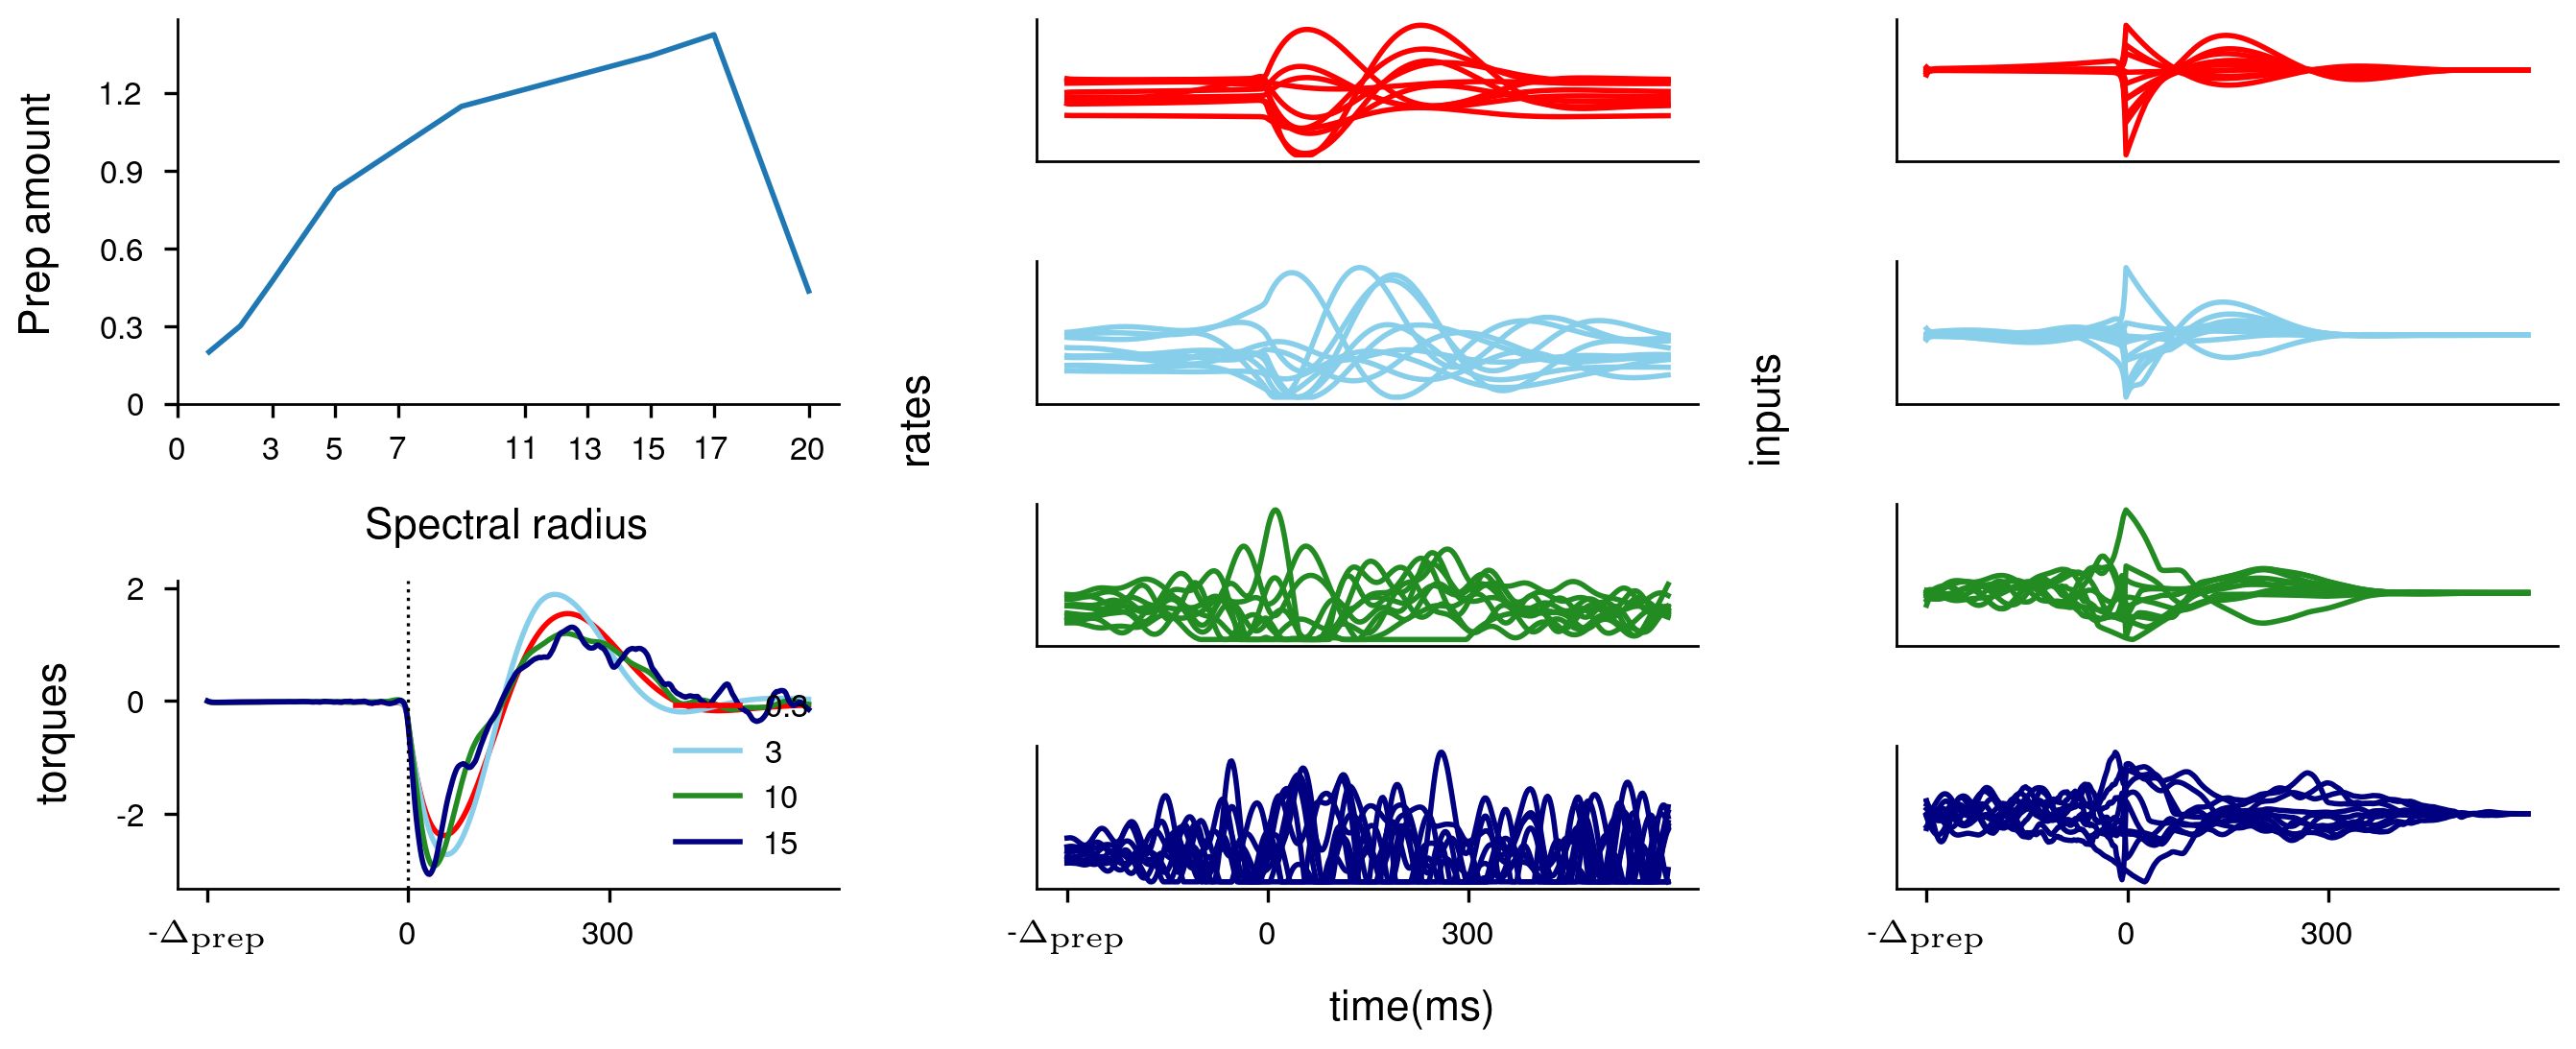

In [ ]:
n_targets = 2
times = [300]
cs = ["r", "skyblue", "forestgreen", "navy", "pink"]
def prep_idx(dir):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 )
            u_prep, u_mov = us[:cutoff+1], us[cutoff+1:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
        return ai
    movs = np.arange(1, n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def dir_rad(rad, seed=3):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_skew/seed_{seed}_200_2_{rad}"

def get_prep_idx(rad, seed=3):
    dir = dir_rad(rad, seed)
    m, _ = prep_idx(dir)
    return m 

fig = plt.figure(figsize=(8, 3), dpi = 400)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
gs = gridspec.GridSpec(4, 3)
rads = [1.,2.,3.,5., 9., 15., 17.0, 20.]

#prep_idces_3 = [get_prep_idx(rad, seed=3)[-1] for rad in rads]
prep_idces_2 = [get_prep_idx(rad, seed=2)[-1] for rad in rads]
# fig, axes = plt.subplots(2,3,figsize=(8,3))

ax00 = plt.subplot(gs[:2,0])
#ax00.plot(rads, prep_idces_3)
ax00.plot(rads, prep_idces_2)
#axes[0,0].plot(rads, prep_idces_2)
ax00.set_xlabel("Spectral radius", fontsize=fs)
ax00.set_ylabel("Prep amount", fontsize=fs)
ax00.set_xticks([0,3,5,7,11,13,15,17,20], [0,3,5,7,11,13,15,17,20],fontsize=fs_m1)
ax00.set_yticks([0,0.3,0.6,0.9,1.2], [0,0.3,0.6,0.9,1.2],fontsize=fs_m1)
def get_torques(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/torques_0_300')

def get_rates(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/rates_0_300')

def get_us(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/us_0_300')

def get_hands(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/hands_0_300')

def get_eigs(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/eigs')
t0 = get_torques(0.3)
t3 = get_torques(3.)
t5 = get_torques(10.)
t15 = get_torques(15.)
ax10 = plt.subplot(gs[2:,0])
ax10.plot(t0[:,0], label="0.3",  color=cs[0])
ax10.plot(t3[:,0], label="3",  color=cs[1])
ax10.plot(t5[:,0], label="10",  color=cs[2])
ax10.plot(t15[:,0], 'k', label="15",  color=cs[3])
ax10.axvline(x = 150,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax10.legend(loc=4)
ax10.set_ylabel("torques", fontsize=fs)
ax10.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax10.set_yticks([-2,0,2], [-2,0,2],fontsize=fs_m1)
pos = ax10.get_position()
ax10.set_position([pos.x0, pos.y0, pos.width, 0.8*pos.height])
ax01, ax11, ax21, ax31 =  plt.subplot(gs[0,1]),  plt.subplot(gs[1,1]),  plt.subplot(gs[2,1]), plt.subplot(gs[3,1])
ax01.plot(get_rates(0.3)[:,:10],  cs[0])
ax01.set_xticks([])
ax01.set_yticks([])
ax11.plot(get_rates(3.)[:,:10],  cs[1])
ax11.set_xticks([])
ax11.set_yticks([])
ax21.plot(get_rates(10.)[:,:10],  cs[2])
ax21.set_xticks([])
ax21.set_yticks([])
ax31.plot(get_rates(15.)[:,:10],  cs[3])
ax31.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax31.set_yticks([])
ax02, ax12, ax22, ax32 =  plt.subplot(gs[0,2]),  plt.subplot(gs[1,2]),  plt.subplot(gs[2,2]), plt.subplot(gs[3,2])
ax02.plot(get_us(0.3)[:,:10], cs[0])
ax02.set_xticks([])
ax02.set_yticks([])
ax12.plot(get_us(3.)[:,:10],  cs[1])
ax12.set_xticks([])
ax12.set_yticks([])
ax22.plot(get_us(10.)[:,:10],  cs[2])
ax22.set_xticks([])
ax22.set_yticks([])
ax32.plot(get_us(15.)[:,:10],  cs[3])
ax32.set_yticks([])
ax32.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
fig.text(0.5, 0.01, 'time(ms)', size = fs)
fig.text(0.36, 0.5, 'rates', rotation = "vertical",size = fs)
fig.text(0.637, 0.5, 'inputs', rotation = "vertical",size = fs)
fig.savefig("skew_nets.pdf", format = "pdf", bbox_inches='tight')

In [ ]:
#checking what happens at a radius of 20?
hand_targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_1E-7/mov_only_soc/hand_targets")
t20 = get_torques(20.)
r20 = get_rates(20.)
u20 = get_us(20.)
h20 = get_hands(20.)
plt.plot(h20[:,0] - h20[0,0], h20[:,2] - h20[0,2])
plt.plot(hand_targets[:,0],hand_targets[:,1],"ok")
plt.figure()
#torques
plt.plot(t20)
plt.figure()
#rates
plt.plot(r20[:,:10])
plt.figure()
#inputs
plt.plot(u20[:,:10])
plt.figure()
#eigs
plt.xlim(-1,1)
plt.plot(get_eigs(20.)[:,0], get_eigs(20.)[:,1], 'o')

FileNotFoundError: /home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_1E-7/mov_only_soc/hand_targets not found.

### Random nets

In [ ]:
n_targets = 2
times = [300]
cs = ["r", "skyblue", "forestgreen", "navy", "pink"]
def prep_idx(dir):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 )
            print(cutoff)
            u_prep, u_mov = us[:cutoff-1], us[cutoff-1:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
        return ai
    movs = np.arange(1, n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def dir_rad(rad, seed=2):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_rdn/seed_{seed}_200_2_{rad}"

def get_prep_idx(rad, seed=3):
    dir = dir_rad(rad, seed)
    m, _ = prep_idx(dir)
    return m 

fig = plt.figure(figsize=(8, 3), dpi = 400)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
gs = gridspec.GridSpec(4, 3)
rads = [0.,0.3,0.5,1.,1.2,1.5,2.,2.5,3.,4.]

#prep_idces_3 = [get_prep_idx(rad, seed=3)[-1] for rad in rads]
prep_idces_2 = [get_prep_idx(rad, seed=2)[-1] for rad in rads]
# fig, axes = plt.subplots(2,3,figsize=(8,3))

ax00 = plt.subplot(gs[:2,0])
#ax00.plot(rads, prep_idces_3)
ax00.plot(rads, prep_idces_2)
#axes[0,0].plot(rads, prep_idces_2)
ax00.set_xlabel("Spectral radius", fontsize=fs)
ax00.set_ylabel("Prep amount", fontsize=fs)
ax00.set_xticks([0,0.5,1,1.5,2,2.5,3,4],[0,0.5,1,1.5,2,2.5,3,4],fontsize=fs_m1)
ax00.set_yticks([0,0.3,0.6], [0,0.3,0.6],fontsize=fs_m1)
def get_torques(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/torques_0_300')

def get_rates(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/rates_0_300')

def get_us(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/us_0_300')

def get_hands(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/hands_0_300')

def get_eigs(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/eigs')
rads = [0.3,0.5,1.0,2.0]
t0 = get_torques(rads[0])
t3 = get_torques(rads[1])
t5 = get_torques(rads[2])
t15 = get_torques(rads[3])
ax10 = plt.subplot(gs[2:,0])
ax10.plot(t0[:,0], label=str(rads[0]),  color=cs[0])
ax10.plot(t3[:,0], label=str(rads[1]),  color=cs[1])
ax10.plot(t5[:,0], label=str(rads[2]),  color=cs[2])
ax10.plot(t15[:,0], 'k', label=str(rads[3]),  color=cs[3])
ax10.axvline(x = 150,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax10.legend(loc=4)
ax10.set_ylabel("torques", fontsize=fs)
ax10.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax10.set_yticks([-2,0,2], [-2,0,2],fontsize=fs_m1)
pos = ax10.get_position()
ax10.set_position([pos.x0, pos.y0, pos.width, 0.8*pos.height])
ax01, ax11, ax21, ax31 =  plt.subplot(gs[0,1]),  plt.subplot(gs[1,1]),  plt.subplot(gs[2,1]), plt.subplot(gs[3,1])
ax01.plot(get_rates(rads[0])[:,:10],  cs[0])
ax01.set_xticks([])
ax01.set_yticks([])
ax11.plot(get_rates(rads[1])[:,:10],  cs[1])
ax11.set_xticks([])
ax11.set_yticks([])
ax21.plot(get_rates(rads[2])[:,:10],  cs[2])
ax21.set_xticks([])
ax21.set_yticks([])
ax31.plot(get_rates(rads[3])[:,:10],  cs[3])
ax31.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax31.set_yticks([])
ax02, ax12, ax22, ax32 =  plt.subplot(gs[0,2]),  plt.subplot(gs[1,2]),  plt.subplot(gs[2,2]), plt.subplot(gs[3,2])
ax02.plot(get_us(rads[0])[:,:10], cs[0])
ax02.set_xticks([])
ax02.set_yticks([])
ax12.plot(get_us(rads[1])[:,:10],  cs[1])
ax12.set_xticks([])
ax12.set_yticks([])
ax22.plot(get_us(rads[2])[:,:10],  cs[2])
ax22.set_xticks([])
ax22.set_yticks([])
ax32.plot(get_us(rads[3])[:,:10],  cs[3])
ax32.set_yticks([])
ax32.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
fig.text(0.5, 0.01, 'time(ms)', size = fs)
fig.text(0.36, 0.5, 'rates', rotation = "vertical",size = fs)
fig.text(0.637, 0.5, 'inputs', rotation = "vertical",size = fs)
fig.savefig("random_nets.pdf", format = "pdf", bbox_inches='tight')

### Nonnormal nets

In [ ]:
n_targets = 3
times = [500]
cs = ["r", "skyblue", "forestgreen", "navy", "pink"]
def prep_idx(dir):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 )
            print(cutoff)
            u_prep, u_mov = us[:cutoff-1], us[cutoff-1:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
        return ai
    movs = np.arange(1, n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def dir_rad(rad, seed=3):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_triang/seed_{seed}_200_2_{rad}"

def get_prep_idx(rad, seed=3):
    dir = dir_rad(rad, seed)
    m, _ = prep_idx(dir)
    return m 

fig = plt.figure(figsize=(8, 3), dpi = 400)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
gs = gridspec.GridSpec(4, 3)
rads = [0.3,0.5,0.7,1.,2.,3.,5.,10.]

prep_idces_3 = [get_prep_idx(rad, seed=3)[-1] for rad in rads]
#prep_idces_2 = [get_prep_idx(rad, seed=2)[-1] for rad in rads]
# fig, axes = plt.subplots(2,3,figsize=(8,3))

ax00 = plt.subplot(gs[:2,0])
#ax00.plot(rads, prep_idces_3)
ax00.plot(rads, prep_idces_3)
#axes[0,0].plot(rads, prep_idces_2)
ax00.set_xlabel("Spectral radius", fontsize=fs)
ax00.set_ylabel("Prep amount", fontsize=fs)
ax00.set_xticks([0,5,10],[0,5,10], fontsize=fs_m1)
# ax00.set_xticks([0,0.5,1,1.5,2,2.5,3,4],[0,0.5,1,1.5,2,2.5,3,4],fontsize=fs_m1)
ax00.set_yticks([0,0.3,0.6], [0,0.3,0.6],fontsize=fs_m1)
def get_torques(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/torques_0_300')

def get_rates(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/rates_0_300')

def get_us(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/us_0_300')

def get_hands(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/hands_0_300')

def get_eigs(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/eigs')
rads = [0.3,0.5,1.0,5.0]
t0 = get_torques(rads[0])
t3 = get_torques(rads[1])
t5 = get_torques(rads[2])
t15 = get_torques(rads[3])
ax10 = plt.subplot(gs[2:,0])
ax10.plot(t0[:,0], label=str(rads[0]),  color=cs[0])
ax10.plot(t3[:,0], label=str(rads[1]),  color=cs[1])
ax10.plot(t5[:,0], label=str(rads[2]),  color=cs[2])
ax10.plot(t15[:,0], 'k', label=str(rads[3]),  color=cs[3])
ax10.axvline(x = 150,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax10.legend(loc=4)
ax10.set_ylabel("torques", fontsize=fs)
ax10.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax10.set_yticks([-2,0,2], [-2,0,2],fontsize=fs_m1)
pos = ax10.get_position()
ax10.set_position([pos.x0, pos.y0, pos.width, 0.8*pos.height])
ax01, ax11, ax21, ax31 =  plt.subplot(gs[0,1]),  plt.subplot(gs[1,1]),  plt.subplot(gs[2,1]), plt.subplot(gs[3,1])
ax01.plot(get_rates(rads[0])[:,:10],  cs[0])
ax01.set_xticks([])
ax01.set_yticks([])
ax11.plot(get_rates(rads[1])[:,:10],  cs[1])
ax11.set_xticks([])
ax11.set_yticks([])
ax21.plot(get_rates(rads[2])[:,:10],  cs[2])
ax21.set_xticks([])
ax21.set_yticks([])
ax31.plot(get_rates(rads[3])[:,:10],  cs[3])
ax31.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax31.set_yticks([])
ax02, ax12, ax22, ax32 =  plt.subplot(gs[0,2]),  plt.subplot(gs[1,2]),  plt.subplot(gs[2,2]), plt.subplot(gs[3,2])
ax02.plot(get_us(rads[0])[:,:10], cs[0])
ax02.set_xticks([])
ax02.set_yticks([])
ax12.plot(get_us(rads[1])[:,:10],  cs[1])
ax12.set_xticks([])
ax12.set_yticks([])
ax22.plot(get_us(rads[2])[:,:10],  cs[2])
ax22.set_xticks([])
ax22.set_yticks([])
ax32.plot(get_us(rads[3])[:,:10],  cs[3])
ax32.set_yticks([])
ax32.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
fig.text(0.5, 0.01, 'time(ms)', size = fs)
fig.text(0.36, 0.5, 'rates', rotation = "vertical",size = fs)
fig.text(0.637, 0.5, 'inputs', rotation = "vertical",size = fs)
fig.savefig("nonnormal_nets.pdf", format = "pdf", bbox_inches='tight')

In [ ]:
w = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_triang/seed_3_200_2_0.5/w")
plt.figure()
plt.imshow(w.T)
plt.savefig("w_tri.pdf", format = "pdf", bbox_inches='tight')

### Low rank network

In [ ]:
n_targets = 3
times = [500]
cs = ["r", "skyblue", "forestgreen", "navy", "pink"]
def prep_idx(dir):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 )
            print(cutoff)
            u_prep, u_mov = us[:cutoff-1], us[cutoff-1:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
        return ai
    movs = np.arange(1, n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def dir_rad(n, seed=1):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/learn_lr/n_{n}_seed_{seed}/res"

def get_prep_idx(rad, seed=1):
    dir = dir_rad(rad, seed)
    m, _ = prep_idx(dir)
    return m 

fig = plt.figure(figsize=(8, 3), dpi = 400)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
gs = gridspec.GridSpec(4, 3)
rads = [2,3,5,8,10]

prep_idces_3 = [get_prep_idx(rad, seed=1)[-1] for rad in rads]
#prep_idces_2 = [get_prep_idx(rad, seed=2)[-1] for rad in rads]
# fig, axes = plt.subplots(2,3,figsize=(8,3))

ax00 = plt.subplot(gs[:2,0])
#ax00.plot(rads, prep_idces_3)
ax00.plot(rads, prep_idces_3)
#axes[0,0].plot(rads, prep_idces_2)
ax00.set_xlabel("Rank", fontsize=fs)
ax00.set_ylabel("Prep amount", fontsize=fs)
ax00.set_xticks([0,5,10],[0,5,10],fontsize=fs_m1)
ax00.set_yticks([0,0.3,0.6], [0,0.3,0.6],fontsize=fs_m1)
def get_torques(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/torques_0_300')

def get_rates(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/rates_0_300')

def get_us(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/us_0_300')

def get_hands(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/hands_0_300')

def get_eigs(rad):
    d = dir_rad(rad)
    return np.loadtxt(f'{d}/eigs')
rads = [2,3,5,10]
t0 = get_torques(rads[0])
t3 = get_torques(rads[1])
t5 = get_torques(rads[2])
t15 = get_torques(rads[3])
ax10 = plt.subplot(gs[2:,0])
ax10.plot(t0[:,0], label=str(rads[0]),  color=cs[0])
ax10.plot(t3[:,0], label=str(rads[1]),  color=cs[1])
ax10.plot(t5[:,0], label=str(rads[2]),  color=cs[2])
ax10.plot(t15[:,0], 'k', label=str(rads[3]),  color=cs[3])
ax10.axvline(x = 150,c = 'k', linestyle = 'dotted', linewidth = 0.6)
ax10.legend(loc=4)
ax10.set_ylabel("torques", fontsize=fs)
ax10.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax10.set_yticks([-2,0,2], [-2,0,2],fontsize=fs_m1)
pos = ax10.get_position()
ax10.set_position([pos.x0, pos.y0, pos.width, 0.8*pos.height])
ax01, ax11, ax21, ax31 =  plt.subplot(gs[0,1]),  plt.subplot(gs[1,1]),  plt.subplot(gs[2,1]), plt.subplot(gs[3,1])
ax01.plot(get_rates(rads[0])[:,:10],  cs[0])
ax01.set_xticks([])
ax01.set_yticks([])
ax11.plot(get_rates(rads[1])[:,:10],  cs[1])
ax11.set_xticks([])
ax11.set_yticks([])
ax21.plot(get_rates(rads[2])[:,:10],  cs[2])
ax21.set_xticks([])
ax21.set_yticks([])
ax31.plot(get_rates(rads[3])[:,:10],  cs[3])
ax31.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
ax31.set_yticks([])
ax02, ax12, ax22, ax32 =  plt.subplot(gs[0,2]),  plt.subplot(gs[1,2]),  plt.subplot(gs[2,2]), plt.subplot(gs[3,2])
ax02.plot(get_us(rads[0])[:,:10], cs[0])
ax02.set_xticks([])
ax02.set_yticks([])
ax12.plot(get_us(rads[1])[:,:10],  cs[1])
ax12.set_xticks([])
ax12.set_yticks([])
ax22.plot(get_us(rads[2])[:,:10],  cs[2])
ax22.set_xticks([])
ax22.set_yticks([])
ax32.plot(get_us(rads[3])[:,:10],  cs[3])
ax32.set_yticks([])
ax32.set_xticks([0,150,300], ['-$\\Delta_{\\textrm{prep}}$', '0', '300'], fontsize=fs_m1)
fig.text(0.5, 0.01, 'time(ms)', size = fs)
fig.text(0.36, 0.5, 'rates', rotation = "vertical",size = fs)
fig.text(0.637, 0.5, 'inputs', rotation = "vertical",size = fs)
fig.savefig("low_rank_nets.pdf", format = "pdf", bbox_inches='tight')

## Show activity for different values of C

In [ ]:
targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_skew/seed_3_200_2_1._0.025/targets")

def dir_c(rad_c):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_skew/seed_3_200_2_1._{rad_c}"
    
def get_rates_c(rad):
    d = dir_c(rad)
    return np.loadtxt(f'{d}/rates_0_300')

def get_mov_c(rad):
    d = dir_c(rad)
    return np.loadtxt(f'{d}/thetas_0_300')

plt.plot(get_rates_c(0.025)[:,:10], 'k')
plt.plot(get_rates_c(0.01)[:,:10], 'r')

## Activity for different regularization values

In [ ]:
targets = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_2E-6/ramping_skew/seed_3_200_2_1._0.025/targets")

def dir_reg(reg):
    return f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/random_monkeys_random_lambda_{reg}/ramping_skew/seed_3_200_2_1."
    
def get_rates_reg(rad):
    d = dir_reg(rad)
    return np.loadtxt(f'{d}/rates_0_300')

def get_mov_reg(rad):
    d = dir_reg(rad)
    return np.loadtxt(f'{d}/thetas_0_300')

plt.plot(get_rates_reg("1E-6")[:], 'k')
plt.figure()
plt.plot(get_rates_reg("5E-7")[:], '-g')
plt.figure()
plt.plot(get_rates_reg("1E-7")[:], '--r')